In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
#1.Data preprocessing
df = pd.read_csv(r"C:\Users\kianh\finsights\finsights_app\twitter_sa\stock_tweets.csv")
df = df.head(100)
df.shape
df['Stock Name'][10]

'TSLA'

In [5]:
#1.Data preprocessing
df_stock = pd.read_csv(r"C:\Users\kianh\finsights\finsights_app\twitter_sa\stock_yfinance_data.csv")
df_stock = df_stock.head(100)
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')

In [6]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [7]:
#1. Data preprocesing - Basic NLTK 
example = df['Tweet'][50]
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'remember',
 'hearing',
 '@',
 'elonmusk',
 'say',
 'years',
 'ago',
 '“',
 'FSD']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('remember', 'VBP'),
 ('hearing', 'VBG'),
 ('@', 'JJ'),
 ('elonmusk', 'NNS'),
 ('say', 'VBP'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('“', 'VBD'),
 ('FSD', 'NNP')]

In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  I/PRP
  remember/VBP
  hearing/VBG
  @/JJ
  elonmusk/NNS
  say/VBP
  years/NNS
  ago/RB
  “/VBD
  (ORGANIZATION FSD/NNP Beta/NNP)
  will/MD
  work/VB
  even/RB
  in/IN
  (GPE San/NNP)
  Francisco/NNP
  ”/NNP
  I/PRP
  didn/VBP
  ’/JJ
  t/NNS
  believe/VBP
  him/PRP
  ./.
  It/PRP
  was/VBD
  too/RB
  hard/JJ
  to/TO
  imagine/VB
  ./.
  (PERSON Fast/NNP)
  forward/NN
  to/TO
  today/NN
  and/CC
  you/PRP
  can/MD
  drive/VB
  in/IN
  rush/JJ
  hour/NN
  traffic/NN
  in/IN
  (GPE San/NNP Francisco/NNP)
  without/IN
  takeover/NN
  more/RBR
  often/RB
  than/IN
  not/RB
  ./.
  (PERSON Crazy/NNP)
  ./.
  $/$
  (ORGANIZATION TSLA/NNP)
  @/NNP
  elonmusk/NN)


In [10]:
#Performs sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [13]:
# Group the tweets by the common identifier (e.g., 'Date')
grouped_tweets = df.groupby('Date')['Tweet'].apply(lambda x: ' '.join(x)).reset_index()

In [14]:
grouped_tweets.head()

,Date,Tweet
0,2022-09-29 04:33:59+00:00,"""If you say, 'OK, who is Tesla hurting the mos..."
1,2022-09-29 04:46:00+00:00,FSD SAVES LIVES. $TSLA \n\nhttps://t.co/4p8wnl...
2,2022-09-29 05:19:26+00:00,“The code you will write will at term run in m...
3,2022-09-29 05:38:00+00:00,Tesla Full Self-Driving Beta is trained on dat...
4,2022-09-29 05:51:42+00:00,Next year the city streets are going to be ver...


In [15]:
#run the polarity score on the entire data set
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    tweet = row['Tweet']
    my_stock = row['Stock Name']
    res[my_stock] = sia.polarity_scores(tweet)

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res)
vaders = vaders.reset_index().rename(columns={'index': 'Stock Name'})
vaders = vaders.merge(df, how='left')

In [17]:
#now have sentiment score and meta data
vaders.head()

,Stock Name,TSLA,Date,Tweet,Company Name
0,compound,-0.6249,NaN,NaN,NaN
1,neg,0.1160,NaN,NaN,NaN
2,neu,0.8840,NaN,NaN,NaN
3,pos,0.0000,NaN,NaN,NaN


C:\Users\kianh\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\kianh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\kianh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\kianh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot: >

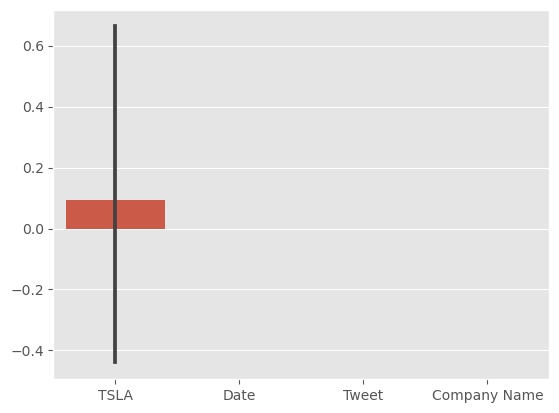

In [18]:
sns.barplot(data=vaders)

In [19]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Roberte Pretrained Model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
#1.Data preprocessing
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
#run the roberta model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [23]:
#2.Sentiment Analysis
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        tweet = row['Tweet']
        my_stock = row['Stock Name']
        vader_result = sia.polarity_scores(tweet)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
    
        roberta_result = polarity_scores_roberta(tweet)
        both = {**vader_result_rename, **roberta_result}
        res[my_stock] = both
        
    except RuntimeError:
        print(f'Broke for stock {my_stock}')

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
#dataset is entirely tesla, since I took the first 500 elements of the tweets, what could I do to fix this?
#1.get a new dataset
#2.run the previous cell on more data

In [25]:
first_pair = next(iter(res.items()))
first_pair 

('TSLA',
 {'vader_neg': 0.116,
  'vader_neu': 0.884,
  'vader_pos': 0.0,
  'vader_compound': -0.6249,
  'roberta_neg': 0.31105196,
  'roberta_neu': 0.56834155,
  'roberta_pos': 0.12060646})

In [26]:
#purpose of this code: merge the results of vader & roberta & stock prices
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Stock Name'})
results_df = results_df.merge(df, how="left")

In [27]:
results_df.head() 

,Stock Name,roberta_neg,roberta_neu,roberta_pos,vader_compound,vader_neg,vader_neu,vader_pos,Date,Tweet,Company Name
0,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,"Tesla, Inc."
1,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,"Tesla, Inc."
2,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,"Tesla, Inc."
3,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,"Tesla, Inc."
4,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...","Tesla, Inc."


In [28]:
#combine the data frames: tweets, sentiments, and stock prices
results_df['Date'] = pd.to_datetime(results_df['Date'])
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
combined_df = pd.concat([results_df, df_stock], axis=1, keys=['Sentiment', 'Prices'])
combined_df.head()

Sentiment                                                               \
  Stock Name roberta_neg roberta_neu roberta_pos vader_compound vader_neg   
0       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
1       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
2       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
3       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
4       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   

                                                 \
  vader_neu vader_pos                      Date   
0     0.884       0.0 2022-09-29 23:41:16+00:00   
1     0.884       0.0 2022-09-29 23:24:43+00:00   
2     0.884       0.0 2022-09-29 23:18:08+00:00   
3     0.884       0.0 2022-09-29 22:40:07+00:00   
4     0.884       0.0 2022-09-29 22:27:05+00:00   

                                                                      Prices  \
                                               Tweet Company Name       Date   
0  Mainstream media has done an amazing job at br...  Tesla, Inc. 2021-09-30   
1  Tesla delivery estimates are at around 364k fr...  Tesla, Inc. 2021-10-01   
2  3/ Even if I include 63.0M unvested RSUs as of...  Tesla, Inc. 2021-10-04   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...  Tesla, Inc. 2021-10-05   
4  @RealDanODowd @Tesla Stop trying to kill kids,...  Tesla, Inc. 2021-10-06   

                                                                         \
         Open        High         Low       Close   Adj Close    Volume   
0  260.333344  263.043335  258.333344  258.493347  258.493347  53868000   
1  259.466675  260.260010  254.529999  258.406677  258.406677  51094200   
2  265.500000  268.989990  258.706665  260.510010  260.510010  91449900   
3  261.600006  265.769989  258.066681  260.196655  260.196655  55297800   
4  258.733337  262.220001  257.739990  260.916656  260.916656  43898400   

              
  Stock Name  
0       TSLA  
1       TSLA  
2       TSLA  
3       TSLA  
4       TSLA

In [29]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [30]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\kianh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because n

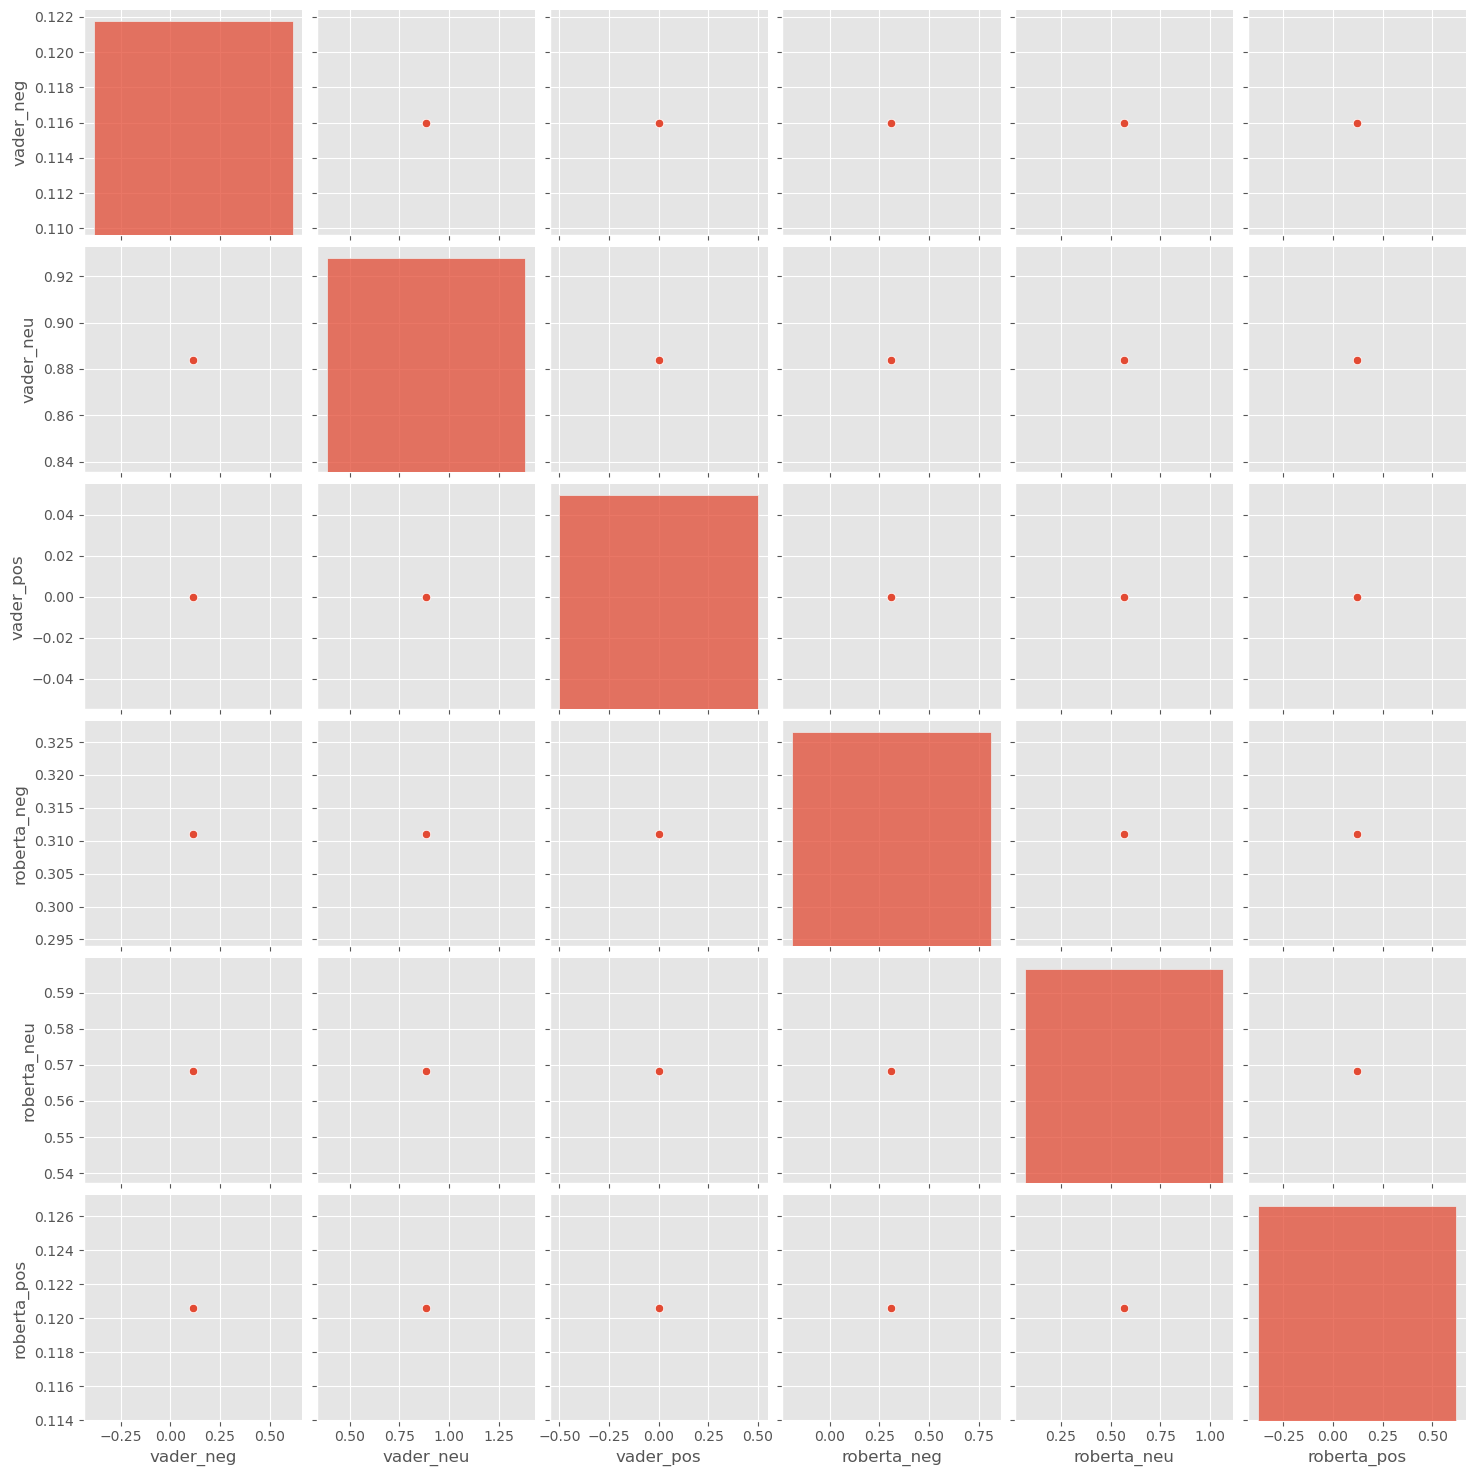

In [31]:
#Combine and compare the models
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10')
plt.show()

In [32]:
#Review Examples
#replace 'score == 1' with? 
#Score is not defined? -> combine the stock price data set with this in review the data
#results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Tweet'].values[0]

In [33]:
combined_df.head()

Sentiment                                                               \
  Stock Name roberta_neg roberta_neu roberta_pos vader_compound vader_neg   
0       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
1       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
2       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
3       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   
4       TSLA    0.311052    0.568342    0.120606        -0.6249     0.116   

                                                 \
  vader_neu vader_pos                      Date   
0     0.884       0.0 2022-09-29 23:41:16+00:00   
1     0.884       0.0 2022-09-29 23:24:43+00:00   
2     0.884       0.0 2022-09-29 23:18:08+00:00   
3     0.884       0.0 2022-09-29 22:40:07+00:00   
4     0.884       0.0 2022-09-29 22:27:05+00:00   

                                                                      Prices  \
                                               Tweet Company Name       Date   
0  Mainstream media has done an amazing job at br...  Tesla, Inc. 2021-09-30   
1  Tesla delivery estimates are at around 364k fr...  Tesla, Inc. 2021-10-01   
2  3/ Even if I include 63.0M unvested RSUs as of...  Tesla, Inc. 2021-10-04   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...  Tesla, Inc. 2021-10-05   
4  @RealDanODowd @Tesla Stop trying to kill kids,...  Tesla, Inc. 2021-10-06   

                                                                         \
         Open        High         Low       Close   Adj Close    Volume   
0  260.333344  263.043335  258.333344  258.493347  258.493347  53868000   
1  259.466675  260.260010  254.529999  258.406677  258.406677  51094200   
2  265.500000  268.989990  258.706665  260.510010  260.510010  91449900   
3  261.600006  265.769989  258.066681  260.196655  260.196655  55297800   
4  258.733337  262.220001  257.739990  260.916656  260.916656  43898400   

              
  Stock Name  
0       TSLA  
1       TSLA  
2       TSLA  
3       TSLA  
4       TSLA

In [34]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [35]:
#Determine if a tweet is bullish or bearish
#1. Calculate the sentiment score differnce: positive - negative
#2. Define a rule:
#ie: bullish >= 0.2 SS, bearish <= -0.2

In [36]:
results_df.head()

,Stock Name,roberta_neg,roberta_neu,roberta_pos,vader_compound,vader_neg,vader_neu,vader_pos,Date,Tweet,Company Name
0,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,"Tesla, Inc."
1,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,"Tesla, Inc."
2,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,"Tesla, Inc."
3,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,"Tesla, Inc."
4,TSLA,0.311052,0.568342,0.120606,-0.6249,0.116,0.884,0.0,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...","Tesla, Inc."


In [37]:
pip install xformers

  Using cached xformers-0.0.20-cp39-cp39-win_amd64.whl (97.6 MB)
  Using cached pyre_extensions-0.0.29-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
#export the analysis, so that it can be used as a function
from transformers import pipeline
#model = x, decleares the pipeine to use the bert model
sent_pipeline = pipeline("sentiment-analysis", model="bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i